# DBSCAN ALGORITHM

**Read the Dataset**

In [1]:
import pandas as pd

df = pd.read_csv('CC GENERAL.csv',index_col = 'CUST_ID')
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

**Remove NaN Values**

In [2]:
df = df.fillna(df.median())
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
CUST_ID                                                                
C10001     40.900749           0.818182      95.40              0.00   
C10002   3202.467416           0.909091       0.00              0.00   
C10003   2495.148862           1.000000     773.17            773.17   
C10004   1666.670542           0.636364    1499.00           1499.00   
C10005    817.714335           1.000000      16.00             16.00   
...              ...                ...        ...               ...   
C19186     28.493517           1.000000     291.12              0.00   
C19187     19.183215           1.000000     300.00              0.00   
C19188     23.398673           0.833333     144.40              0.00   
C19189     13.457564           0.833333       0.00              0.00   
C19190    372.708075           0.666667    1093.25           1093.25   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
CUST_ID                                                              
C10001                    95.40      0.000000             0.166667   
C10002                     0.00   6442.945483             0.000000   
C10003                     0.00      0.000000             1.000000   
C10004                     0.00    205.788017             0.083333   
C10005                     0.00      0.000000             0.083333   
...                         ...           ...                  ...   
C19186                   291.12      0.000000             1.000000   
C19187                   300.00      0.000000             1.000000   
C19188                   144.40      0.000000             0.833333   
C19189                     0.00     36.558778             0.000000   
C19190                     0.00    127.040008             0.666667   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
CUST_ID                                                                 
C10001                     0.000000                          0.083333   
C10002                     0.000000                          0.000000   
C10003                     1.000000                          0.000000   
C10004                     0.083333                          0.000000   
C10005                     0.083333                          0.000000   
...                             ...                               ...   
C19186                     0.000000                          0.833333   
C19187                     0.000000                          0.833333   
C19188                     0.000000                          0.666667   
C19189                     0.000000                          0.000000   
C19190                     0.666667                          0.000000   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
CUST_ID                                                            
C10001                 0.000000                 0              2   
C10002                 0.250000                 4              0   
C10003                 0.000000                 0             12   
C10004                 0.083333                 1              1   
C10005                 0.000000                 0              1   
...                         ...               ...            ...   
C19186                 0.000000                 0              6   
C19187                 0.000000                 0              6   
C19188                 0.000000                 0              5   
C19189                 0.166667                 2              0   
C19190                 0.333333                 2             23   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
CUST_ID                                                                         
C10001         1000.0   201.802084        139.509787          0.000000      12  
C10002         7000.0  4103.032597       1072.340217          0.222222      12  
C10003

In [3]:
dataset = df.values

**Function to Create Distance Matrix**

In [4]:
import numpy as np

def DistanceMatrix(dataset):
    distance_matrix = np.zeros((len(dataset),len(dataset)))
    for i in range(distance_matrix.shape[0]):
        distance_matrix[i] = np.sqrt(np.sum((dataset-dataset[i])**2,axis = 1))
    return distance_matrix

**DBSCAN Function**

In [5]:
UNDEFINED = -1
NOISE = -2

def DBSCAN(dataset, eps, min_points):
    distance_matrix = DistanceMatrix(dataset)
    C = 0                                                    #Cluster Number
    Cluster = np.ones(len(dataset),dtype = int)*UNDEFINED    #Initialise Clusters of points
    for i in range(len(dataset)):
        if Cluster[i] != UNDEFINED:                          #Previously Processed
            continue
        N = np.where(distance_matrix[i]<=eps)[0]             #Find Neighbours
        if len(N) < min_points:
            Cluster[i] = NOISE                               #Label as Noise
            continue
        C = C+1                                              #Next Cluster Label
        Cluster[i] = C                                       #Label Initial Point
        S = list(np.delete(N, np.where(N == i)))             #Neighbors to expand
        while S != []:                                       #Process every seed point j
            j = S.pop(0)
            if Cluster[j] == NOISE:                          #Change Noise to border point
                Cluster[j] = C
            if Cluster[j] != UNDEFINED:                      #Previously processed (e.g., border point)
                continue
            Cluster[j] = C                                   #Label neighbor
            N = np.where(distance_matrix[j]<=eps)[0]         #Find neighbors
            if len(N) >= min_points:                         #Density check (if j is a core point)
                S = list(set(S + list(N)))                   #Add new neighbors to seed set
    return Cluster

**Run Algorithm**

In [6]:
labels = DBSCAN(dataset, eps=1000, min_points=20)

In [7]:
print('Label -1 Corresponds to UNDEFINED Cluster')
print('Labels of Data Points: ',labels)
print('Count of Labels',np.unique(labels,return_counts=True))

Label -1 Corresponds to UNDEFINED Cluster
Labels of Data Points:  [ 1 -2  2 ...  1  1  1]
Count of Labels (array([-2,  1,  2,  3]), array([3215, 5658,   32,   45], dtype=int64))


**Visualise Clusters**

In [8]:
from itertools import combinations

combs = list(combinations(df.columns,2))

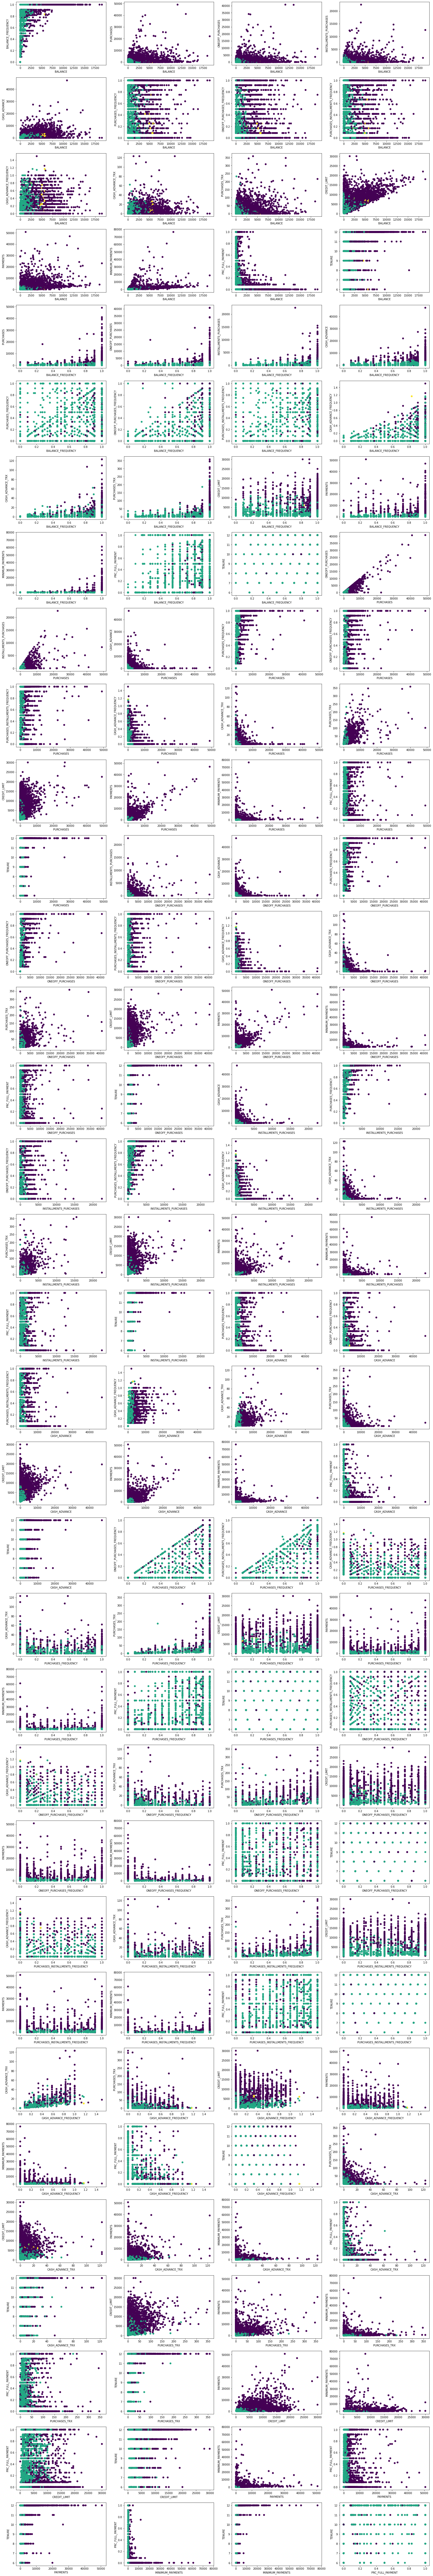

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize = (28,178.5))
for i in range(len(combs)):
    plt.subplot(34,4,i+1)
    plt.scatter(df[combs[i][0]],df[combs[i][1]], c = labels)
    plt.xlabel(combs[i][0])
    plt.ylabel(combs[i][1])
plt.savefig('Output Plots.jpg',dpi = 150)
plt.show()